**本章主要知识点**：
- 线性模型的基本概念
- 线性回归模型
- 岭回归模型
- 套索回归模型
- 二分类中的逻辑回归和线性SVC模型

#### 4.1 线性模型的基本概念
- 线性模型原本是统计学中的术语
- 线性模型不是指某一个模型，而是一类模型；
- 在机器学习领域中线性模型包含：线性回归、岭回归、套索回归、逻辑回归、和线性SVC等

##### 线性模型的一般公式
- ![公式简化：](C:\Users\ziyih\Documents\笔记\图片\1.png)
- 类似直线的方程解析式；
- W[0]看做是直线的斜率；
- 如果数据的特征值增加，每个W值就会对应每个特征直线的斜率；
- 换种理解：模型给出的预测可看做是输入特征的加权和，而w参数代表了每个特征的权重。w也可是负数。

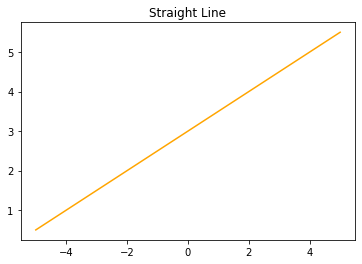

In [61]:
# 假如有条直线，方程式y = 0.5x +3 ，可以使用jupyter notebook把它画出来
import numpy as np
import matplotlib.pyplot as plt
# 令x为-5到5之间， 元素数为100的等差数列
x = np.linspace(-5, 5, 100)
# 输入直线方程
y = 0.5*x + 3
plt.plot(x,y, c = "orange")
# 图题设为：
plt.title('Straight Line')
plt.show()

##### 线性模型的图形表示

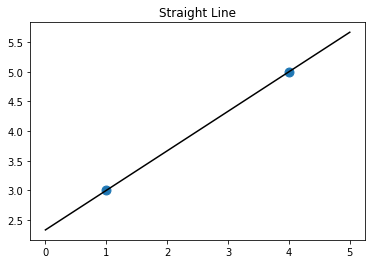

In [62]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 输入两个点的横坐标
X = [[1], [4]]
# 输入两个点的纵坐标
Y = [3, 5]
# 用线性模型拟合这两个点
lr = LinearRegression().fit(X, Y)
# 画出这两个点和直线图形
z = np.linspace(0, 5, 20)  # 在指定的时间间隔内返回均匀分布的数字。返回num 个均匀分布的样本，在区间 [ start , stop ] 上计算。
plt.scatter(X,Y,s = 80)
plt.plot(z, lr.predict(z.reshape(-1,1)), c = 'k')
plt.title('Straight Line')
plt.show()

【结果分析】上图就的是闯过（1，3） 和（4，5）的直线，现在我们可以确这条直线的方程：

In [63]:
print('\n\n\n直线方程为：')  # 这一行代码主要是为了截图好卡
print('============================')
# 打印直线方程
"""
coef_和intercept_都是模型参数，即为w(所谓斜率)

coef_为w1到w4

intercept_为w0 （所谓截距）
"""
print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))
print('\n============================')
print('\n\n\n')




直线方程为：
y = 0.667 x + 2.333







【结果分析】通过程序计算，我们可以得到这条这些方程y = 0.667 x + 2.333。
这是两个点的情况，如果加入第三个点（3，3）呢，我们来试验一下：

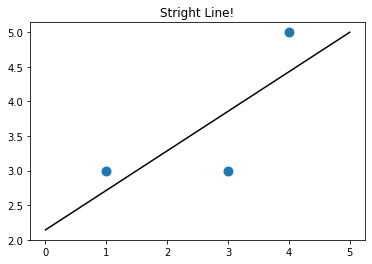

In [64]:
# 输入3个点的横坐标
x = [[1], [4], [3]]
# 输入3个点的纵坐标
y = [3, 5, 3]
# 用线性模型来拟合这三个点
lr = LinearRegression().fit(x,y)
# 画出2个点和直线的图形
z = np.linspace(0, 5, 20)
plt.scatter(x,y,s =80)
plt.plot(z, lr.predict(z.reshape(-1,1)), c = 'k')
# 设定图题
plt.title('Stright Line!')
plt.show()

【结果分析】可以看出上图中直线这次没有经过任何一个点，而是位于一个和单个点的距离相加最小的位置
下面我们可以计算出这条直线的方程：

In [65]:
print('\n\n\n直线方程为：')  # 这一行代码主要是为了截图好卡
print('============================')
# 打印直线方程
print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))
print('\n============================')
print('\n\n\n')




直线方程为：
y = 0.571 x + 2.143







【结果分析】线性模型让自己距离每个数据点的加和为最小值，这也是线性回归模型的原理。
在实际应用中，数据量要远远大于2，下面我们用scikit_klearn生成的make_regression数据集为例。
用Python语句绘制线性模型的预测线，更清晰的反映线性模型的原理。输入代码如下：

Text(0.5, 1.0, 'Linear Regression!')

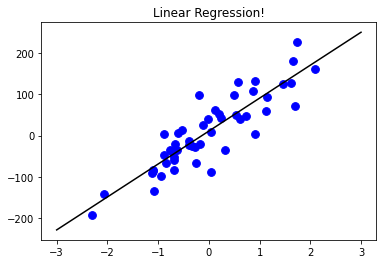

In [66]:
from sklearn.datasets import make_regression
# 生成用于回归分析的数据集
""""
sklearn的make_regression函数能生成回归样本数据。

n_samples：样本数
n_features：特征数(自变量个数)
n_informative：参与建模特征数
n_targets：因变量个数
noise：噪音
bias：偏差(截距)
coef：是否输出coef标识
random_state：随机状态若为固定值则每次产生的数据都一样

"""
x, y = make_regression(n_samples=50, n_features=1,
                       n_informative=1, noise=50, random_state=1)
# 使用线性模型进行预测
reg = LinearRegression().fit(x, y)
# z 是我们生成的等差数列，用来画出线性模型的图形
z = np.linspace(-3, 3, 200).reshape(-1, 1)
plt.scatter(x, y, c='b', s=60)
plt.plot(z, reg.predict(z), c='k')
plt.title('Linear Regression!')
# plt.show()

【结果分析】从上图结果中可以看出，黑色直线为线性回归模型在make_regression数据集中生成的预测线。
接下来看看这条线对应的斜率和截距

In [67]:
print('\n\n\n代码运行结果：') 
print('============================')
# 打印直线方程的系数和截距
print('直线的系数是：{:.2f}'.format(reg.coef_[0]))
print('直线的截距是：{:.2f}'.format(reg.intercept_))
print('\n============================')
print('\n\n\n')




代码运行结果：
直线的系数是：79.52
直线的截距是：10.92







【结果分析】从上图中我们看到了，我们手工生成的数据集中，线性模型的方程为： y = 79.52x + 10.92
而这条线距离50个点的距离之和，是最小的。这边是一般线性模型的原理。

【scikit-learn的特点】如coef_和intercept_这两属性，它总是用下划线作为来自训练数据集的属性的结尾，以便与用户设置的参数区分开。

##### 线性模型的特点
- 特征值+目标值
- ![特征值+目标值](C:\Users\ziyih\Documents\笔记\图片\特征值与目标值.png)
- 以上内容我们都是使用特征数只有1个的数据集；
- 用回归分析的线性模型在特征数为1的数据集中，是使用一条直线来进行预测分析，
- 而当数据集的特征数量达到2则是一个平面，更多则是一个高维度的超平面；
- 使用线性模型的前提条件是：假设目标y是数据特征的线性组合
- 对于一维数据集来验证，结果会偏颇，但对于特征变量大于数据点的数量时，线性模型就显得十分强大！
- 特别是：当数据集特征变量大于数据点的数据量是，线性模型可以对训练数据做出近乎完美的预测！
- 用于回归分析的线性模型有很多种，区别在于如何从训练集中确定模型参数W和b，以及如何控制模型的复杂度
- 项目我们介绍几种经典的线性模型并在实践中看看它们的表现：

#### 最基本的线性模型——线性回归
原理
- 找到训练数据集中y的预测值和其真实值的平方差最小时所对应的w值和b值
- 线性回归没有可供用户调节的参数，这是它的优势，但也代码表我们无法控制模型的复杂性；
- 用特征值为2的数据量，并划分训练数据集和测试数据集，再用线性回归模型计算出w值和b值；

##### 线性回归的基本原理

In [68]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)  # random_state：随机状态若为固定值则每次产生的数据都一样
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
lr = LinearRegression().fit(x_train, y_train)
# 接下来我们打印出方程的斜率w 和截距b出来：
print('\n\n\n代码运行结果：') 
print('=============================\n')
# 打印直线方程的系数和截距
print('lr.coef_：{}'.format(lr.coef_[:]))
print('lr.intercept_:{}'.format(lr.intercept_))
print('\n============================')
print('\n\n\n')




代码运行结果：

lr.coef_：[70.38592453  7.43213621]
lr.intercept_:-1.4210854715202004e-14







【结果分析】本例中线性回归模型的方程可以表示为：![](C:\Users\ziyih\Documents\笔记\图片\4.2.1线性回归结果方程.png)

##### 线性回归的性能表现

In [69]:
print('\n\n\n代码运行结果：') 
print('=============================\n')
# 打印直线方程的系数和截距
print('训练数据集得分：{:.2f}'.format(lr.score(x_train, y_train)))
print('训练数据集得分：{:.2f}'.format(lr.score(x_test, y_test)))
print('\n============================')
print('\n\n\n')




代码运行结果：

训练数据集得分：1.00
训练数据集得分：1.00







【结果分析】分数都得了满分！ 不过不要高兴得太早，因为我们的数据集热整数只有1，而且没有添加noise。
在真实世界的数据集中，特征数很多，noise也不少，这会给线性模型带来不上的困扰

下面用真实数据集——糖尿病情数据集，再来测试一下：

In [70]:
from sklearn.datasets import load_diabetes
# 载入糖尿病数据集
x, y = load_diabetes().data, load_diabetes().target
# 将数据集分成训练和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
# 使用线性回归进行拟合
lr = LinearRegression().fit(x_train, y_train) 
# 看看得分：
print('\n\n\n代码运行结果：') 
print('=============================\n')
# 打印直线方程的系数和截距
print('训练数据集得分：{:.2f}'.format(lr.score(x_train, y_train)))
print('训练数据集得分：{:.2f}'.format(lr.score(x_test, y_test)))
print('\n============================')
print('\n\n\n')





代码运行结果：

训练数据集得分：0.53
训练数据集得分：0.46







【结果分析】对比这两分数，可以发现，这次模型的分数降低了许多，并且从训练集到测试集的分数下降了

- 由于真实世界数据很复杂；
- 由于线性回归自身特点非常容易出现过拟合现象。训练集和测试集得分存在巨大差异是明确的信号
- 因此我们应该找到一个模型，能够控制模型的复杂度:标准线性回归最常用的替代模型之一是岭回归

#### 使用L2正则化的线性模型——岭回归
原理：
1. 避免过拟合的线性模型；
2. 会保留所有的特征变量，会减小特征变量的系数值，让特征变量对预测结果影响变小；
3. 通过改变alpha参数来控制减小特征变量系数的程度。
4. 这种通过保留全部特征变量，只降低特征变量的系数值来避免过拟合的方法，我么称之为L2正则化。
5. 岭回归在scikit中通过linear_model.Ridge函数来调用
6. 下面用波士顿的房价的扩展数据集看看岭回归表现如何：

In [71]:
# 导入岭回归
from sklearn.linear_model import Ridge
# 使用岭回归对数据进行拟合
ridge = Ridge().fit(x_train, y_train)
print('\n\n\n代码运行结果：') 
print('=============================\n')
print('岭回归的训练数据结果：{:.2f}'.format(ridge.score(x_train, y_train)))
print('岭回归的测试数据结果：{:.2f}'.format(ridge.score(x_test, y_test)))
print('\n============================')
print('\n\n\n')





代码运行结果：

岭回归的训练数据结果：0.43
岭回归的测试数据结果：0.43







【结果分析】
1. 使用岭回归后，训练集得分比现行回归稍微低，但是测试数据集得分确和训练集得分出人意料地一致
2. 线性回归中，模型出现轻微过拟合现象，而由于岭回归是一个相对受限的模型，所以我们发生过拟合的可能性大大降低
3. 复杂度越低的模型，在训练数据集上表现越差，但是其泛化能力会更好；
4. 如果我们在意模型的泛化方面的表现，就应该选择岭回归模型，而不是线性回归模型。

##### 岭回归的参数调节
1. 岭回归是在模型的简单性（使系数趋近于0）和它在训练集上的性能之间取得平衡的一种模型。
2. 用户可以使用alpha参数控制模更加简单性还是在训练集上的性能更高
3. 上面的示例中，我们默认参数alpha = 1
4. alpha的最佳设置取决于我们使用的特定数据集，
5. **alpha与特征向量系数成反比例关系**，使其趋于0，从而降低它在训练集上的性能，有助于泛化

In [72]:
# 这个例子仍然使用糖尿病数据集，但是把正则项参数设置为10
rigde10 = Ridge(alpha=10).fit(x_train, y_train)
print('\n\n\n代码运行结果：') 
print('=============================\n')
print('训练数据结果：{:.2f}'.format(rigde10.score(x_train, y_train)))
print('测试数据结果：{:.2f}'.format(rigde10.score(x_test, y_test)))
print('\n============================')
print('\n\n\n')




代码运行结果：

训练数据结果：0.15
测试数据结果：0.16







【结果分析】
- 提高alpha后模型得分大大降低；
- 有意思的是在测试集的得分反而高于训练集的得分
- 这说明：模型出现过拟合的现象，我们可以提高alpha值来降低过拟合程度
- 下面我们用一个非常小的alpha值，得到的结果也会无限接近线性回归：

In [93]:
# 修改alpha值为0.1
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print('\n\n\n代码运行结果：') 
print('=============================\n')
print('训练数据结果：{:.2f}'.format(rigde01.score(x_train, y_train)))
print('测试数据结果：{:.2f}'.format(rigde01.score(x_test, y_test)))
print('\n============================')
print('\n\n\n')




代码运行结果：

训练数据结果：0.52
测试数据结果：0.47







【结果分析】
- alpha值设为0.1（越小使其特征系数变高）让模型在训练集的分比线性回归模型略低，但測試集中有轻微提升
- 还可以不断尝试降低alpha值来进一步改善模型的泛化表现；
- 使用图像来观察不同的alpha值对应的模型，coef_属性
- 较高的alpha值代表模型的限制更加严格，所以我们认为，在较高的alpha值下，coef_（斜率）属性数值会更小，反之coef_值更大：

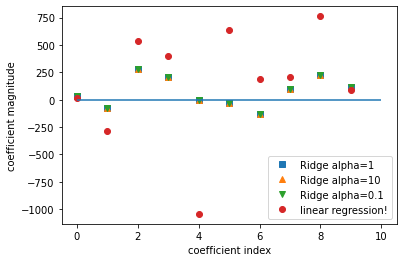

In [74]:
# 绘制alpha=1时的模型系数
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
# 绘制alpha=10时的模型系数
plt.plot(ridge.coef_, '^', label='Ridge alpha=10')
# 绘制alpha=0.1时的模型系数
plt.plot(ridge.coef_, 'v', label='Ridge alpha=0.1')

# 绘制线性回归的系数作为对比：
plt.plot(lr.coef_, 'o', label='linear regression!')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()


【结果分析】当alpha = 10时，特征系数在0附近，降低alpha为1、0.1时，特征系数越来越大，接近于线性回归模型的值。

下面我们取固定的alpha值，然后改变训练数据集的数据量，然后用这些采样的子集对线性回归模型和alpha值等于1的岭回归模型进行评估，并画出一个随数据集大小而不断变化的模型评分折线图。其中折线我们称之为学习曲线（learning curves）

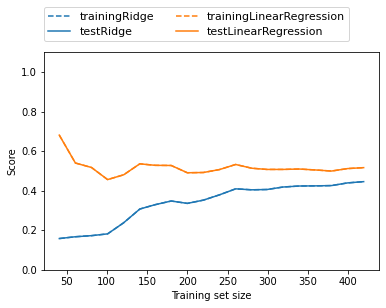

In [81]:
from sklearn.model_selection import learning_curve, KFold
# 定义一个绘制学习曲线的函数


def plot_learning_curve(est, x, y):
    # 将模型数据进行20次拆分用来对模型进行评分
    training_set_size, train_scores, test_scores = learning_curve(
        est, x, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(
        axis=1), '--', label='training' + estimator_name)
    plt.plot(training_set_size, train_scores.mean(axis=1), '-',
             label='test' + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)


plot_learning_curve(Ridge(alpha=1), x, y)
plot_learning_curve(LinearRegression(), x, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)


【结果分析】
1. 毫无疑问，不论是岭回归还是线性回归，训练数据集得分都比测试数据集得分要高，而由于岭回归是正则化的模型，因此在整个图像训练集的得分都比线性回归低

2. 然而岭回归在测试集中得分比训练集得分差异要小一些，尤其是在数据集比较小的情况下；
3. 数据量小于50 ，线性回归几乎上不能学习任何东西
4. 随着数据集增大，两个模型表现也越来越好，最后线性回归得分也赶上了岭回归得分，不难看出有足够的数据，那么正则化就不那么重要了。


#### 使用L1正则化的线性模型——套索回归
**套索回归原理（lasso）**
- 和岭回归一样，套索回归也会将系数限制在非常接近0的范围内，但进行限制的方式稍微不同，称之为L1正则化；
- 与L2正则化不同的是，L1正则化会导致在使用套索回归的时候，有一部分特征系数正好等于0，有些特征会彻底被模型忽略掉；
- 这个有利于模型更容易理解，可以突出体现模型的一些重要的特性。
  

In [82]:
# 用糖尿病数据集来验证下lasso：
# 导入套索回归lasso：
from sklearn.linear_model import Lasso
# 使用套索回归拟合数据
lasso = Lasso().fit(x_train, y_train)
print('\n\n\n代码运行结果：')
print('=============================\n')
print('lasso在训练数据集的得分：{:.2f}'.format(lasso.score(x_train, y_train)))
print('lasso在测试数据集的得分：{:.2f}'.format(lasso.score(x_test, y_test)))
print('套索回归使用的特征数：{}'.format(np.sum(lasso.coef_ != 0)))





代码运行结果：

lasso在训练数据集的得分：0.36
lasso在测试数据集的得分：0.37
套索回归使用的特征数：3


【结果分析】
1. 套索回归在训练数据集和测试数据集结果都不好
2. 说明我们的模型出现欠拟合的问题；
3. 而且10个特征里面套索回归只用了3个；
4. 与岭回归相似，套索回归也有一个正则化参数alpha，用来控制特征变量系数（斜率）被约束到0的强度。

##### 套索回归参数调节
- 上述例子里，用了默认alpha值为1，为了降低欠拟合程度，还可以降低alpha的值，
- 同时，可加大迭代次数（max_iter）默认设置

In [83]:
# 增加最大迭代次数的默认设置
# 否则模型会提示我们增大最大迭代次数
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(x_train, y_train)
print('\n\n\n代码运行结果：')
print('=============================\n')
print('alpha=0.1时，lasso在训练数据集的得分：{:.2f}'.format(lasso01.score(x_train, y_train)))
print('alpha=0.1时，lasso在测试数据集的得分：{:.2f}'.format(lasso01.score(x_test, y_test)))
print('alpha=0.1时，套索回归使用的特征数：{}'.format(np.sum(lasso01.coef_ != 0)))





代码运行结果：

alpha=0.1时，lasso在训练数据集的得分：0.52
alpha=0.1时，lasso在测试数据集的得分：0.48
alpha=0.1时，套索回归使用的特征数：7







【结果分析】
1. 降低alpha值可以拟合出更复杂的模型；从而得到良好的表现
2. 相对岭回归，lasso表现要稍微好一点，而且只用了10个特征中的7个，这一点也会使模型更容易被人理解；
3. 如果把正则化设置得太低，相当于去除了正则化，模型可能出现像线性回归一样过拟合的问题；
4. 如果把alpha设置为0.0001，看看表现：

In [92]:
# 修改alpha值为0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print('\n\n\n代码运行结果：')
print('=============================\n')
print('alpha=0.0001时，lasso在训练数据集的得分：{:.2f}'.format(lasso00001.score(x_train, y_train)))
print('alpha=0.0001时，lasso在测试数据集的得分：{:.2f}'.format(lasso00001.score(x_test, y_test)))
print('alpha=0.0001时，套索回归使用的特征数：{}'.format(np.sum(lasso00001.coef_ != 0)))
print('\n============================')
print('\n\n\n')




代码运行结果：

alpha=0.0001时，lasso在训练数据集的得分：0.53
alpha=0.0001时，lasso在测试数据集的得分：0.46
alpha=0.0001时，套索回归使用的特征数：10







【结果分析】
1. 从结果中我们看到此时套索回归使用了全部特征；
2. 而且在测试数据集中得分稍低于训练数据集得分；
3. 这说明降低alpha值会让模型更倾向于出现过拟合的现象。

##### 套索回归和岭回归对比
用不同的alpha值的lasso和ridge进行系数对比

Text(0.5, 0, 'Coefficient index')

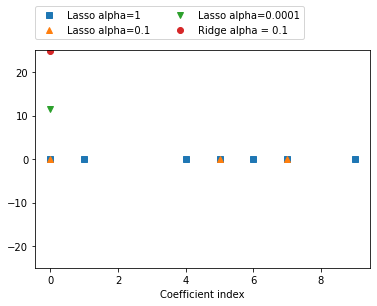

In [100]:
# 绘制alpha值等于1时的模型系数
plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
# 绘制alpha值等于0.11时的模型系数
plt.plot(lasso01.coef_, '^', label = 'Lasso alpha=0.1')
# 绘制alpha值等于0.0001时的模型系数
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
# 绘制alpha值等于0.1的lasso系数最为对比
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")

【结果分析】
1. 在实践中，岭回归往往是这两个模型中的优选；
2. 但是如果数据特征过多，而其中只有一小部分是真正重要的，lasso是最好的选择；
3. 如果你需要对模型进行解释，那么lasso将更容易让你的模型被人理解，因为他只是输入了特征值中的一部分。
   

【注意】
1. scikit-learn 还提供了一种模型，弹性网模型（Elastic Net）；
2. Elastic net综合了lasso和ridge的惩罚因子；
3. 在实践中，这两个模型组合是效果最好的；
4. 代价是：需要用户调整两个参数，一个是L1正则化参数，另一个是L2正则化参数。

#### 小结
1. 本章介绍了常用的几种现象模型：线性回归、岭回归、套索回归，实际上，线性模型还有比较知名的逻辑斯谛回归（Logistic Regression）、线性支持向量机（Linear SVM）等，它们不仅仅可用来回归分析，也可以用来分类任务。
2. 对线性模型来说，最主要的参数是正则化（Regularization Parameter）；
3. 在线性回归、岭回归、套索回归是用alpha来调节的，而逻辑斯谛回归（Logistic Regression）、线性支持向量机（Linear SVM）等使用参数C来调节正则化的；
4. 实际应用中我们决定使用L1还是L2正则化模型大体原则如下：
5. 特征多但并不是每一个对结果都有重要的影响，用————L1正则化模型————如套索回归；
6. 特征少但其中每一个对结果都有重要的影响，用————L2正则化模型————如岭回归；
7. 线性模型优点：训练速度快、对超大数据集友好、其过程容易理解；
8. 线性模型确定：局限性，数据特征少时，表现偏弱；
9. 即将介绍流行算法——朴素贝叶斯算法：是一种基于概率理论的算法，效率比线性模型还要高些